## Week 04: Grocery Stores in the City of LA
<b>By: Monisha Reginald</b><br><br>
<b>Purpose:</b> This week, I advanced my coding and my group's project by working with two new datasets that contain information about the locations of grocery stores in LA. In order to understand whether or not Seniors can access grocery stores by non-car-based modes, we first must understand where the grocery stores are.<br>
<b>Part 1:</b> I used Socrata to import a dataset published by the City of LA that contains information about grocery store locations. After geocoding and mapping this data (and doing some analysis to ensure that the issue was not _caused_ by the geocoding), I realized that this dataset was geographically incomplete. Due to this data quality problem, I turned to a new dataset in Part 2.<br>
<b>Part 2:</b> I imported a dataset from the USDA that contains the locations of SNAP Retailer. This dataset is overly inclusive, so I experimented with two different strategies for cleaning the data. I then applied lessons from this week's lab to create 3 summary charts and maps that help describe the prevalance of grocery store chains across various neighborhoods in LA.<br>
<b>Part 3:</b> I created a simple map with an overlay of the locations of grocery store chains (from Part 2) and the number of seniors per square mile (from another group member's assignment for this week) to begin exploring the relationship between the locations of seniors and of chain grocery stores.

### Part 1: Application of APIs (and a self-guided exploration into geocoding) to map LA City's grocery store data

In [1]:
# Import packages that will be useful for this assignment.
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx

First, I am going to aquire the grocery store data using the Socrata API. We want to use the dataset published by City of LA that lists all active businesses currently registered with the Office of Finance. This is a particularly useful application of an API because the LA City grocery store data is refreshed monthly, so an API will allow our script to remain up-to-date over the course of the quarter (and facilitate easy updates in the future!) Manual exports and metadata for this dataset are available at: https://data.lacity.org/Administration-Finance/Grocery-Stores/g986-7yf9

In [2]:
# Import the Socrata package
from sodapy import Socrata

# Specify that LA City is the data portal and g986-7yf9 is the dataset identifier taht we're looking for.
client = Socrata("data.lacity.org", None)

# From the metadata, we know that this dataset has 1,236 rows as of January 2023, so we will set the maximum to an arbitrary number of rows above this.
results = client.get("g986-7yf9", limit=2000)

# Finally we convert this to a dataframe called grocery_api.
grocery_api = pd.DataFrame.from_records(results)

I use .head() and .info() to take an initial look at how the data has been formatted

In [3]:
grocery_api.head()

zip_code :@computed_region_qz3q_ghft :@computed_region_k96s_3jcv  \
0  90065-1215                       24030                         378   
1  90042-1744                       23673                         365   
2  90036-1717                       23667                         625   
3  90019-4226                       23080                         647   
4  90042-4015                       23673                         374   

  mailing_city         city :@computed_region_kqwf_mjcx  \
0     COMMERCE  LOS ANGELES                          11   
1     COMMERCE  LOS ANGELES                           9   
2          NaN  LOS ANGELES                           6   
3          NaN  LOS ANGELES                          12   
4  LOS ANGELES  LOS ANGELES                          11   

              business_name :@computed_region_2dna_qi2s   naics  \
0         SUPER A FOODS INC                          94  445100   
1         SUPER A FOODS INC                          93  445100   
2  GLATT WESTERN KOSHER INC                          26  445100   
3  GLATT WESTERN KOSHER INC                          69  445100   
4   LA TROPICANA MARKET INC                          93  445100   

                           primary_naics_description  ...  \
0  Grocery stores (including supermarkets & conve...  ...   
1  Grocery stores (including supermarkets & conve...  ...   
2  Grocery stores (including supermarkets & conve...  ...   
3  Grocery stores (including supermarkets & conve...  ...   
4  Grocery stores (including supermarkets & conve...  ...   

  :@computed_region_tatf_ua23              dba_name           street_address  \
0                        1214         SUPER A FOODS     2925 DIVISION STREET   
1                         439         SUPER A FOODS           5250 YORK BLVD   
2                        1081  GLATT WESTERN KOSHER     444 N FAIRFAX AVENUE   
3                        1352                   NaN         4817 W PICO BLVD   
4                         686   LA TROPICANA MARKET  5200 MONTE VISTA STREET   

  :@computed_region_ur2y_g4cx mailing_zip_code      location_start_date  \
0                          13       90040-3647  1972-01-02T00:00:00.000   
1                         NaN       90040-3647  1999-07-29T00:00:00.000   
2                         NaN              NaN  1992-02-17T00:00:00.000   
3                         NaN              NaN  2012-03-01T00:00:00.000   
4                          28       90042-4015  2003-06-16T00:00:00.000   

           mailing_address   location_account council_district  \
0     7200 DOMINION CIRCLE  0000003004-0001-9                1   
1     7200 DOMINION CIRCLE  0000003004-0003-5               14   
2                      NaN  0000003718-0001-8                5   
3                      NaN  0000003718-0002-6               10   
4  5200 MONTE VISTA STREET  0000003971-0001-4                1   

                                          location_1  
0  {'latitude': '34.1029', 'needs_recoding': Fals...  
1  {'latitude': '34.1204', 'needs_recoding': Fals...  
2  {'latitude': '34.0792', 'needs_recoding': Fals...  
3  {'latitude': '34.0482', 'needs_recoding': Fals...  
4  {'latitude': '34.1084', 'needs_recoding': Fals...  

[5 rows x 21 columns]

In [4]:
# Look at info and verify that all rows have been imported (i.e. that the number of rows matches the expected number online info)
grocery_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1236 entries, 0 to 1235
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   zip_code                     1236 non-null   object
 1   :@computed_region_qz3q_ghft  1156 non-null   object
 2   :@computed_region_k96s_3jcv  1151 non-null   object
 3   mailing_city                 613 non-null    object
 4   city                         1236 non-null   object
 5   :@computed_region_kqwf_mjcx  1127 non-null   object
 6   business_name                1236 non-null   object
 7   :@computed_region_2dna_qi2s  1044 non-null   object
 8   naics                        1236 non-null   object
 9   primary_naics_description    1236 non-null   object
 10  location_description         1236 non-null   object
 11  :@computed_region_tatf_ua23  1155 non-null   object
 12  dba_name                     1013 non-null   object
 13  street_address               1236

This data set is very messy, so I am going to first take just the columns that I am interested in and then rename them where desired.

In [5]:
#Create new geodataframe with subset of columns.
grocery_columns = grocery_api[['location_account','business_name','dba_name','street_address','zip_code','location_1']].copy()
grocery_columns.head()

location_account             business_name              dba_name  \
0  0000003004-0001-9         SUPER A FOODS INC         SUPER A FOODS   
1  0000003004-0003-5         SUPER A FOODS INC         SUPER A FOODS   
2  0000003718-0001-8  GLATT WESTERN KOSHER INC  GLATT WESTERN KOSHER   
3  0000003718-0002-6  GLATT WESTERN KOSHER INC                   NaN   
4  0000003971-0001-4   LA TROPICANA MARKET INC   LA TROPICANA MARKET   

            street_address    zip_code  \
0     2925 DIVISION STREET  90065-1215   
1           5250 YORK BLVD  90042-1744   
2     444 N FAIRFAX AVENUE  90036-1717   
3         4817 W PICO BLVD  90019-4226   
4  5200 MONTE VISTA STREET  90042-4015   

                                          location_1  
0  {'latitude': '34.1029', 'needs_recoding': Fals...  
1  {'latitude': '34.1204', 'needs_recoding': Fals...  
2  {'latitude': '34.0792', 'needs_recoding': Fals...  
3  {'latitude': '34.0482', 'needs_recoding': Fals...  
4  {'latitude': '34.1084', 'needs_recoding': Fals...

This location data is not very usable, so I am going to geocode it! To do this, first I will create a single column with a full address by concatenating the relavant information from other columns.

In [6]:
#Create new string column from concatenation of address strings.
grocery_columns["full_address"] = grocery_columns["street_address"] + ", LOS ANGELES, CALIFORNIA " + grocery_columns["zip_code"]

#Check that this worked.
grocery_columns.head()

location_account             business_name              dba_name  \
0  0000003004-0001-9         SUPER A FOODS INC         SUPER A FOODS   
1  0000003004-0003-5         SUPER A FOODS INC         SUPER A FOODS   
2  0000003718-0001-8  GLATT WESTERN KOSHER INC  GLATT WESTERN KOSHER   
3  0000003718-0002-6  GLATT WESTERN KOSHER INC                   NaN   
4  0000003971-0001-4   LA TROPICANA MARKET INC   LA TROPICANA MARKET   

            street_address    zip_code  \
0     2925 DIVISION STREET  90065-1215   
1           5250 YORK BLVD  90042-1744   
2     444 N FAIRFAX AVENUE  90036-1717   
3         4817 W PICO BLVD  90019-4226   
4  5200 MONTE VISTA STREET  90042-4015   

                                          location_1  \
0  {'latitude': '34.1029', 'needs_recoding': Fals...   
1  {'latitude': '34.1204', 'needs_recoding': Fals...   
2  {'latitude': '34.0792', 'needs_recoding': Fals...   
3  {'latitude': '34.0482', 'needs_recoding': Fals...   
4  {'latitude': '34.1084', 'needs_recoding': Fals...   

                                        full_address  
0  2925 DIVISION STREET, LOS ANGELES, CALIFORNIA ...  
1  5250 YORK BLVD, LOS ANGELES, CALIFORNIA 90042-...  
2  444 N FAIRFAX AVENUE, LOS ANGELES, CALIFORNIA ...  
3  4817 W PICO BLVD, LOS ANGELES, CALIFORNIA 9001...  
4  5200 MONTE VISTA STREET, LOS ANGELES, CALIFORN...

Now I am going to import a geocoding package and geocoder (Nominatim) and then geocode these full addresses into a new column.

In [7]:
# Import necessary package and geocoder, and specify desired parameters for geocoding.
import geopy as gpy
from geopy.geocoders import Nominatim
geolocator = Nominatim(timeout=10, user_agent="up221_groceries")

In [8]:
#Create a new variables (geocoded_address) that stores values as the geocoder is run!
grocery_columns['geocoded_address'] = grocery_columns.full_address.apply(geolocator.geocode)

In [9]:
#Check that this worked.
grocery_columns.head()

location_account             business_name              dba_name  \
0  0000003004-0001-9         SUPER A FOODS INC         SUPER A FOODS   
1  0000003004-0003-5         SUPER A FOODS INC         SUPER A FOODS   
2  0000003718-0001-8  GLATT WESTERN KOSHER INC  GLATT WESTERN KOSHER   
3  0000003718-0002-6  GLATT WESTERN KOSHER INC                   NaN   
4  0000003971-0001-4   LA TROPICANA MARKET INC   LA TROPICANA MARKET   

            street_address    zip_code  \
0     2925 DIVISION STREET  90065-1215   
1           5250 YORK BLVD  90042-1744   
2     444 N FAIRFAX AVENUE  90036-1717   
3         4817 W PICO BLVD  90019-4226   
4  5200 MONTE VISTA STREET  90042-4015   

                                          location_1  \
0  {'latitude': '34.1029', 'needs_recoding': Fals...   
1  {'latitude': '34.1204', 'needs_recoding': Fals...   
2  {'latitude': '34.0792', 'needs_recoding': Fals...   
3  {'latitude': '34.0482', 'needs_recoding': Fals...   
4  {'latitude': '34.1084', 'needs_recoding': Fals...   

                                        full_address  \
0  2925 DIVISION STREET, LOS ANGELES, CALIFORNIA ...   
1  5250 YORK BLVD, LOS ANGELES, CALIFORNIA 90042-...   
2  444 N FAIRFAX AVENUE, LOS ANGELES, CALIFORNIA ...   
3  4817 W PICO BLVD, LOS ANGELES, CALIFORNIA 9001...   
4  5200 MONTE VISTA STREET, LOS ANGELES, CALIFORN...   

                                    geocoded_address  
0  (2925, Division Street, Mount Washington, Los ...  
1  (Super A Foods, 5250, York Boulevard, Highland...  
2  (444, North Fairfax Avenue, Beverly Grove, Los...  
3  (Western Kosher Pico, 4817, West Pico Boulevar...  
4  (5200, Monte Vista Street, Highland Park, Los ...

In [10]:
#Inspect new info.
grocery_columns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1236 entries, 0 to 1235
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   location_account  1236 non-null   object
 1   business_name     1236 non-null   object
 2   dba_name          1013 non-null   object
 3   street_address    1236 non-null   object
 4   zip_code          1236 non-null   object
 5   location_1        1209 non-null   object
 6   full_address      1236 non-null   object
 7   geocoded_address  1049 non-null   object
dtypes: object(8)
memory usage: 77.4+ KB


Not all rows were able to be geocoded, which we can tell because the number of non-null values in "geocoded_address" is not the same as the number of rows. That is a problem that I am going to come back to later, but for now I will create a new dataframe (grocery_geocoded) by filtering for only the rows where geocoded_address is not null. 

In [11]:
# Create filtered dataset.
grocery_geocoded = grocery_columns.loc[grocery_columns['geocoded_address'].notnull()].copy()

# Check to make sure that this worked. There should now only be 1,049 rows, and the number of rows and non-null values in geocoded_address should match.
grocery_geocoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1049 entries, 0 to 1234
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   location_account  1049 non-null   object
 1   business_name     1049 non-null   object
 2   dba_name          867 non-null    object
 3   street_address    1049 non-null   object
 4   zip_code          1049 non-null   object
 5   location_1        1029 non-null   object
 6   full_address      1049 non-null   object
 7   geocoded_address  1049 non-null   object
dtypes: object(8)
memory usage: 73.8+ KB


Now, I am going to reformat my dataframe in a way that will allow it to be converted to a geodataframe (i.e., create a separate latitude and longtidue column).

In [12]:
# First, I am going to create two new columns that will store the geocoded latitude and longitude for each grocery stores.
grocery_geocoded['lat_geocoded']=''
grocery_geocoded['long_geocoded']=''

# Now I use a loop to assign geocoded latitude to the new latitude column for each row.
for i in grocery_geocoded.index:
    grocery_geocoded['lat_geocoded'].loc[i]=grocery_geocoded['geocoded_address'].loc[i].latitude
    
# Now I use a loop to assign geocoded longitude to the new latitude column for each row
for i in grocery_geocoded.index:
    grocery_geocoded['long_geocoded'].loc[i]=grocery_geocoded['geocoded_address'].loc[i].longitude

In [13]:
#Use .head() to check that this worked.
grocery_geocoded.head()

location_account             business_name              dba_name  \
0  0000003004-0001-9         SUPER A FOODS INC         SUPER A FOODS   
1  0000003004-0003-5         SUPER A FOODS INC         SUPER A FOODS   
2  0000003718-0001-8  GLATT WESTERN KOSHER INC  GLATT WESTERN KOSHER   
3  0000003718-0002-6  GLATT WESTERN KOSHER INC                   NaN   
4  0000003971-0001-4   LA TROPICANA MARKET INC   LA TROPICANA MARKET   

            street_address    zip_code  \
0     2925 DIVISION STREET  90065-1215   
1           5250 YORK BLVD  90042-1744   
2     444 N FAIRFAX AVENUE  90036-1717   
3         4817 W PICO BLVD  90019-4226   
4  5200 MONTE VISTA STREET  90042-4015   

                                          location_1  \
0  {'latitude': '34.1029', 'needs_recoding': Fals...   
1  {'latitude': '34.1204', 'needs_recoding': Fals...   
2  {'latitude': '34.0792', 'needs_recoding': Fals...   
3  {'latitude': '34.0482', 'needs_recoding': Fals...   
4  {'latitude': '34.1084', 'needs_recoding': Fals...   

                                        full_address  \
0  2925 DIVISION STREET, LOS ANGELES, CALIFORNIA ...   
1  5250 YORK BLVD, LOS ANGELES, CALIFORNIA 90042-...   
2  444 N FAIRFAX AVENUE, LOS ANGELES, CALIFORNIA ...   
3  4817 W PICO BLVD, LOS ANGELES, CALIFORNIA 9001...   
4  5200 MONTE VISTA STREET, LOS ANGELES, CALIFORN...   

                                    geocoded_address lat_geocoded  \
0  (2925, Division Street, Mount Washington, Los ...    34.103095   
1  (Super A Foods, 5250, York Boulevard, Highland...    34.119807   
2  (444, North Fairfax Avenue, Beverly Grove, Los...    34.079111   
3  (Western Kosher Pico, 4817, West Pico Boulevar...    34.048408   
4  (5200, Monte Vista Street, Highland Park, Los ...    34.108488   

  long_geocoded  
0   -118.235587  
1   -118.201305  
2   -118.361347  
3   -118.341488  
4   -118.200909

Great! Now I can convert this to a geodataframe!

<AxesSubplot: >

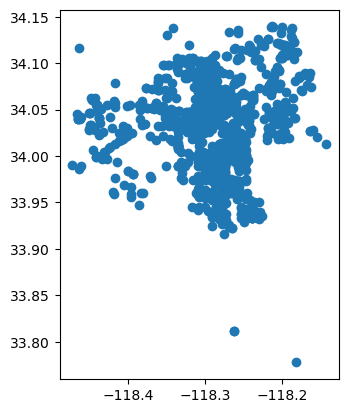

In [14]:
grocery_locations = gpd.GeoDataFrame(
    grocery_geocoded, geometry=gpd.points_from_xy(grocery_geocoded.long_geocoded, grocery_geocoded.lat_geocoded),crs=4326)
# Basic plot to check that this worked.
grocery_locations.plot()

That technically worked, but the map looks suspiciously like it does not cover the entire City of LA. To investigate, I will add a baselayer and other cosmetic adjustments through matplotlib and contextily.

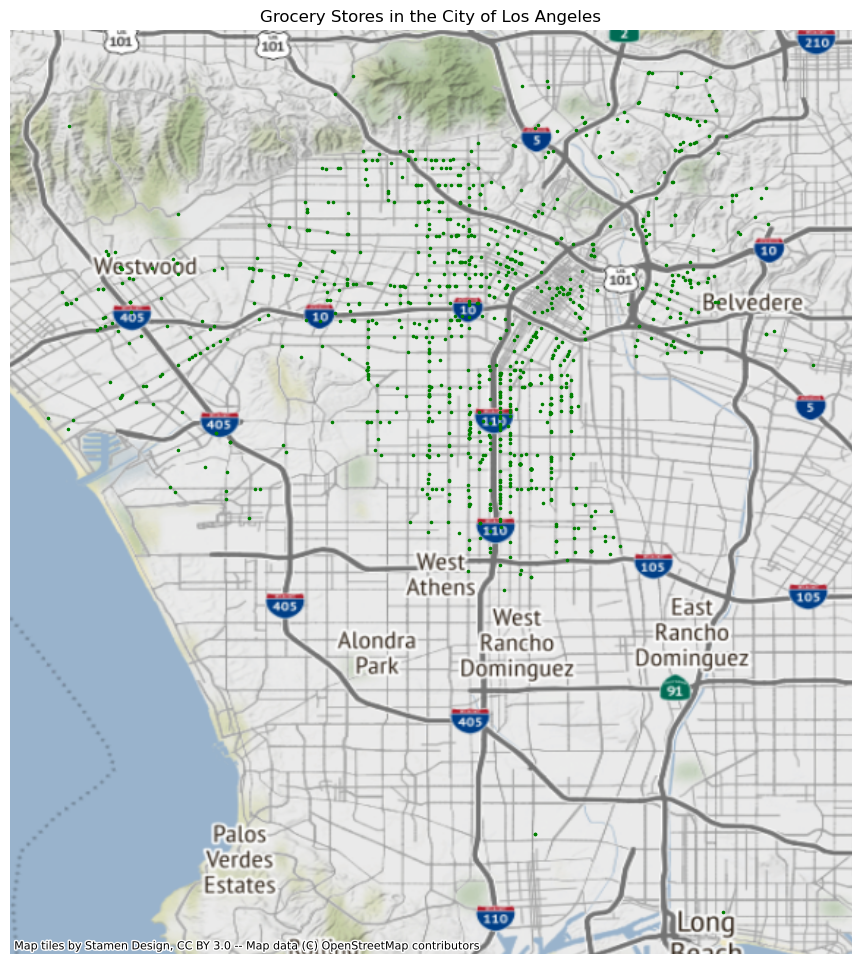

In [15]:
fig, ax = plt.subplots(figsize=(12,12))
grocery_locations.plot(ax=ax, 
        marker='.',
        markersize=10,
        color='green')
ax.axis('off')
ax.set_title('Grocery Stores in the City of Los Angeles')
ctx.add_basemap(ax, crs=4326)

Ah no! Huge areas (notably the Valley!) are entirely missing! The question is if this is a datasource issue or a geocoding issue, so I will have to check what's going on with the original datafile. I am going to use zipcodes to get a sense for what's in the original datafile.

In [16]:
#Create a new dataframe that has just the zipcode column from the grocery store data.
zipcodes = grocery_api[['zip_code']].copy()

#Take a look at how the data is formatted.
zipcodes.head()

zip_code
0  90065-1215
1  90042-1744
2  90036-1717
3  90019-4226
4  90042-4015

I want to summarize by five-digit zipcode, so I'll have to parse out this data. To do this, I will use a new function (str.split) to pull out just the first five digits of each zipcode.

In [17]:
# Create a temporary new dataframe (zipsplit) that contains the results of a function that splits zip_codes based on the "-" character.
zipsplit=zipcodes["zip_code"].str.split("-", n = 1, expand = True)

#Assign the first half of the split string to a "zip_core" column in the original dataframe.
zipcodes["zip_core"]=zipsplit[0]

#Check that this worked.
zipcodes.head()

zip_code zip_core
0  90065-1215    90065
1  90042-1744    90042
2  90036-1717    90036
3  90019-4226    90019
4  90042-4015    90042

I will now create a new dataframe that shows every zipcode in the _original dataset_ and how often it appears.

In [18]:
#Calculate count of each zipcode.
zipcount = zipcodes['zip_core'].value_counts()

#Convert this into a dataframe.
zipcount = zipcount.reset_index()

#Have to change the settings to see the full list of zipcodes.
pd.set_option('display.max_rows', None)
zipcount

index  zip_core
0   90011       100
1   90003        89
2   90037        65
3   90044        49
4   90006        43
5   90019        34
6   90057        31
7   90033        30
8   90042        29
9   90029        27
10  90018        27
11  90026        27
12  90047        27
13  90062        26
14  90007        25
15  90020        22
16  90034        21
17  90001        21
18  90005        21
19  90004        21
20  90015        21
21  90014        20
22  90031        19
23  90016        19
24  90028        19
25  90027        19
26  90066        18
27  90012        18
28  90064        18
29  90035        18
30  90065        17
31  90036        17
32  90023        16
33  90063        16
34  90021        16
35  90025        16
36  90017        16
37  90002        16
38  90059        16
39  90038        15
40  90032        14
41  90043        14
42  90061        13
43  90013        13
44  90045        12
45  90041        10
46  90008         9
47  90024         9
48  90046         9
49  90039         7
50  90010         7
51  90068         5
52  90022         5
53  90058         4
54  90067         4
55  90048         3
56  90049         3
57  90071         2
58  90077         2
59  90089         1
60  90230         1
61  90069         1
62  90291         1
63                1
64  91606         1

The good news? That worked. The bad news? This dataset is very incomplete and completely missing the Valley as suspected. So back to the drawing board I guess.

### Part 2: Application of interactive charts/maps and exploration of a new dataset (USDA SNAP Retailers)

Due to problems with the LA City grocery store file, I am going to try using a different datasource: the USDA list of all retailers that accept EBT, where is available at https://www.fns.usda.gov/snap/retailer-locator

In [19]:
# Import packages that will be useful for this assignment.
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx

This dataset allows us to use an API to directly import the data as a geojson from https://usda-fns.hub.arcgis.com/datasets/USDA-FNS::snap-store-locations/ but doing so is making the kernel die, so for now I will import a csv.

In [20]:
grocery_snap=pd.read_csv('SNAP_Store_Locations.csv')

# Look at basic data structure.
grocery_snap.head()

X          Y              Store_Name                 Address  \
0 -158.02536  21.497705       CVS Pharmacy 9300      925 California Ave   
1 -122.84501  46.008877  KALAMA SHOPPING CENTER            223 N 1st St   
2 -122.82722  45.984581        Rebel Truck Stop  7349 Old Pacific Hwy S   
3 -124.05382  46.351131          Supermart #12       111 Bolstad Ave SE   
4 -124.05363  46.367340        Pioneer Mart Llc      2006 Pacific Ave N   

  Address_Line__2        City State   Zip5  Zip4    County  Longitude  \
0             NaN     Wahiawa    HI  96786  2123  HONOLULU -158.02536   
1             NaN      Kalama    WA  98625   NaN   COWLITZ -122.84501   
2             NaN      Kalama    WA  98625  9481   COWLITZ -122.82722   
3             NaN  Long Beach    WA  98631  9202   PACIFIC -124.05382   
4             NaN  Long Beach    WA  98631  3998   PACIFIC -124.05363   

    Latitude  ObjectId  
0  21.497705         1  
1  46.008877         2  
2  45.984581         3  
3  46.351131         4  
4  46.367340         5

Now I convert this to a geodataframe.

<AxesSubplot: >

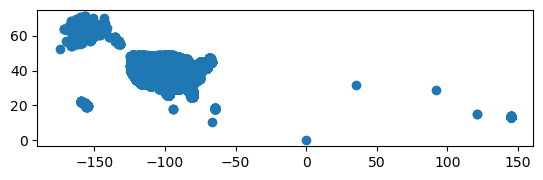

In [21]:
grocery_snap = gpd.GeoDataFrame(
    grocery_snap, geometry=gpd.points_from_xy(grocery_snap.Longitude, grocery_snap.Latitude),crs=4326)
# Basic plot to check that this worked.
grocery_snap.plot()

The most obvious problem here is that the file contains data for the entire United States. We can solve by clipping this dataset to a LA Times neighborhoood boundary file that we'll use later anyways.<br><br> First I will import the neighborhood boundary data directly to a geodataframe.

<AxesSubplot: >

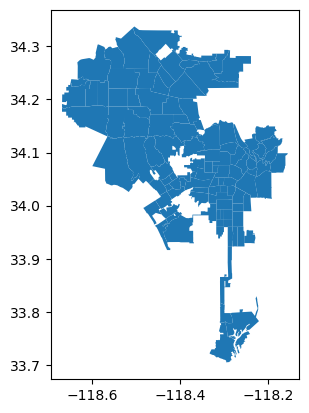

In [22]:
neighborhoods = gpd.read_file("https://services5.arcgis.com/7nsPwEMP38bSkCjy/arcgis/rest/services/LA_Times_Neighborhoods/FeatureServer/0/query?outFields=*&where=1%3D1&f=geojson")
neighborhoods.plot()

Now, I'll the SNAP store geodataframe to the LA Times neighborhood boundary geodataframe.

<AxesSubplot: >

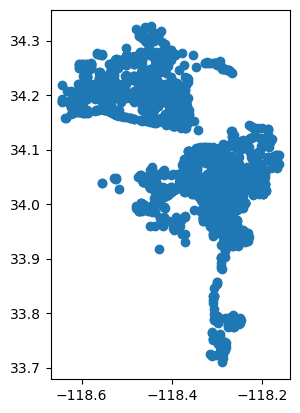

In [23]:
#Create a new geodataframe made up of the grocery store points, clipped to the "mask" of the neighborhood boundaries so that you're left with just grocery stores in City of LA.
snap_la = gpd.clip(grocery_snap, neighborhoods)

#Check to see if this worked.
snap_la.plot()

These points are looking more reasonable, but I want to add a basemap and make it larger to get a better gut-check.

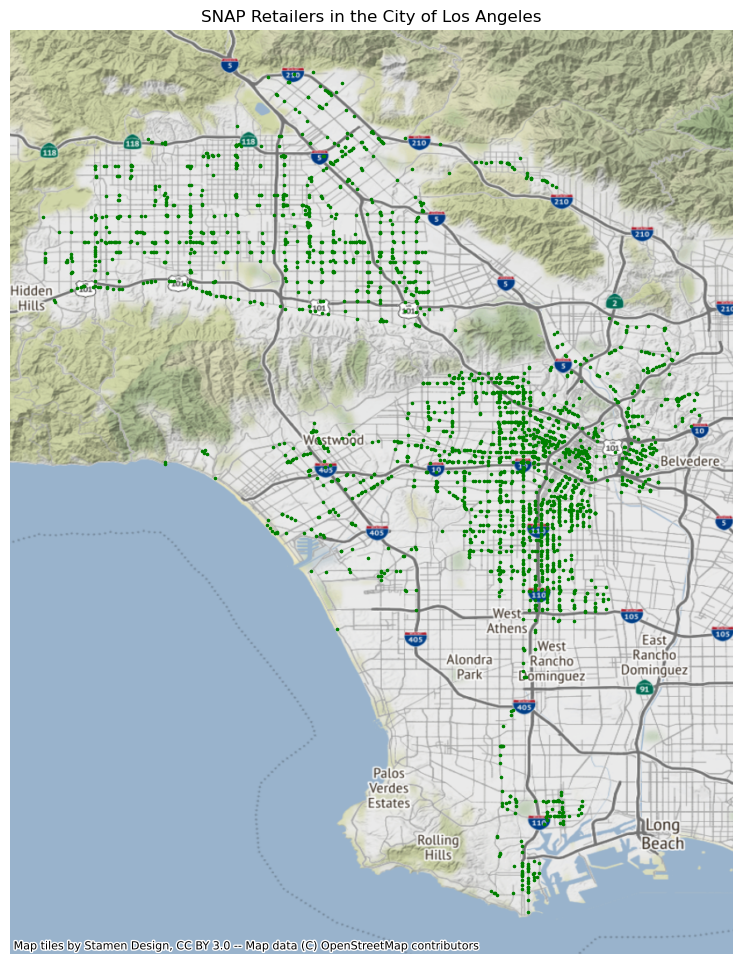

In [24]:
fig, ax = plt.subplots(figsize=(12,12))
snap_la.plot(ax=ax, 
        marker='.',
        markersize=10,
        color='green')
ax.axis('off')
ax.set_title('SNAP Retailers in the City of Los Angeles')
ctx.add_basemap(ax, crs=4326)

Good! This dataset appears to be geographically complete. However, while workign through the procedures above, I noticed that it contains a different problem - it is overly inclusive because many locations that are not grocery stores (e.g. convenient stores, gas station markets, etc.) accept EBT.<br><br>To solve this problem, I am going to create a new geodataframe callsed "snap_clean" that removes rows if their name contains a key word (e.g. "liquor") that denotes locations I'd like to drop. This is not a comprehensive solution, but it helps clean out some of the biggest problems. 

In [25]:
#Set the strings to be all lower case to minimize the number of variations on the same name that we have to search for.
snap_la['Store_Name']=snap_la['Store_Name'].str.lower()

/opt/conda/lib/python3.10/site-packages/geopandas/geodataframe.py:1443: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [26]:
#Create snap_clean.
snap_clean = snap_la[snap_la['Store_Name'].str.contains('7-eleven')==False]

In [27]:
# Remove rows if they contain a given substring. This list is not complete and will be added to over the course of this project.
snap_clean = snap_clean[snap_clean['Store_Name'].str.contains('7-eleven')==False]
snap_clean = snap_clean[snap_clean['Store_Name'].str.contains('7 eleven')==False]
snap_clean = snap_clean[snap_clean['Store_Name'].str.contains('7eleven')==False]
snap_clean = snap_clean[snap_clean['Store_Name'].str.contains('liquor')==False]
snap_clean = snap_clean[snap_clean['Store_Name'].str.contains('cvs')==False]
snap_clean = snap_clean[snap_clean['Store_Name'].str.contains('rite aid')==False]
snap_clean = snap_clean[snap_clean['Store_Name'].str.contains('walgreens')==False]
snap_clean = snap_clean[snap_clean['Store_Name'].str.contains('arco')==False]
snap_clean = snap_clean[snap_clean['Store_Name'].str.contains('chevron')==False]
snap_clean = snap_clean[snap_clean['Store_Name'].str.contains('circle k')==False]
snap_clean = snap_clean[snap_clean['Store_Name'].str.contains('g&m')==False]
snap_clean = snap_clean[snap_clean['Store_Name'].str.contains('rocket')==False]

#See how things are looking.
snap_clean.head()

X          Y                         Store_Name  \
162264 -118.31068  33.721760                          vons 2162   
207329 -118.31312  33.723164                  smart & final 923   
55762  -118.29908  33.723179                        alma market   
162571 -118.31236  33.723270                  south shore water   
89108  -118.29841  33.743370  numero uno market - san pedro 121   

                   Address Address_Line__2       City State   Zip5  Zip4  \
162264      1440 W 25th St             NaN  San Pedro    CA  90732  4418   
207329      1636 W 25th St             NaN  San Pedro    CA  90732  4302   
55762       2305 S Alma St             NaN  San Pedro    CA  90731  5714   
162571  2434 S Western Ave             NaN  San Pedro    CA  90732  4334   
89108         970 W 1st St             NaN  San Pedro    CA  90731  1998   

             County  Longitude   Latitude  ObjectId  \
162264  LOS ANGELES -118.31068  33.721760    162265   
207329  LOS ANGELES -118.31312  33.723164    207330   
55762   LOS ANGELES -118.29908  33.723179     55763   
162571  LOS ANGELES -118.31236  33.723270    162572   
89108   LOS ANGELES -118.29841  33.743370     89109   

                           geometry  
162264  POINT (-118.31068 33.72176)  
207329  POINT (-118.31312 33.72316)  
55762   POINT (-118.29908 33.72318)  
162571  POINT (-118.31236 33.72327)  
89108   POINT (-118.29841 33.74337)

In part because it willl be difficult to create a fully "clean" dataset based on exclusions, I'm also interested in the locations of chain grocery stores.<br><br>
To begin this analysis, I'll create a new column with the name of the chain that a grocery store is a member of if the name matches a substring search. Not that this is similarly not comprehensive.

In [28]:
#Define name of new variable.
snap_clean['chain_name']='unknown'

#Set a new value for chain_name if Store_Name contains a specified substring. Note that this list is not exhaustive and will be added to throughout the project. 
snap_clean.loc[snap_clean['Store_Name'].str.contains('albertsons'), 'chain_name'] = 'Albertsons'
snap_clean.loc[snap_clean['Store_Name'].str.contains("albertson's"), 'chain_name'] = 'Albertsons'
snap_clean.loc[snap_clean['Store_Name'].str.contains("aldi"), 'chain_name'] = 'Aldi'
snap_clean.loc[snap_clean['Store_Name'].str.contains('el super'), 'chain_name'] = 'El Super'
snap_clean.loc[snap_clean['Store_Name'].str.contains('food 4 less'), 'chain_name'] = 'Food 4 Less'
snap_clean.loc[snap_clean['Store_Name'].str.contains("food for less"), 'chain_name'] = 'Food 4 Less'
snap_clean.loc[snap_clean['Store_Name'].str.contains("gelson's market"), 'chain_name'] = "Gelson's"
snap_clean.loc[snap_clean['Store_Name'].str.contains("gelsons market"), 'chain_name'] = "Gelson's"
snap_clean.loc[snap_clean['Store_Name'].str.contains("numero uno market"), 'chain_name'] = "Numero Uno Market"
snap_clean.loc[snap_clean['Store_Name'].str.contains("ralphs"), 'chain_name'] = 'Ralphs'
snap_clean.loc[snap_clean['Store_Name'].str.contains("ralph's"), 'chain_name'] = 'Ralphs'
snap_clean.loc[snap_clean['Store_Name'].str.contains("smart & final"), 'chain_name'] = 'Smart & Final'
snap_clean.loc[snap_clean['Store_Name'].str.contains("smart and final"), 'chain_name'] = 'Smart & Final'
snap_clean.loc[snap_clean['Store_Name'].str.contains("sprouts"), 'chain_name'] = 'Sprouts'
snap_clean.loc[snap_clean['Store_Name'].str.contains("superior grocers"), 'chain_name'] = 'Superior Grocers'
snap_clean.loc[snap_clean['Store_Name'].str.contains("trader joe's"), 'chain_name'] = "Trader Joe's"
snap_clean.loc[snap_clean['Store_Name'].str.contains("trader joes"), 'chain_name'] = "Trader Joe's"
snap_clean.loc[snap_clean['Store_Name'].str.contains("vallarta supermarket"), 'chain_name'] = 'Vallarta Spermarkets'
snap_clean.loc[snap_clean['Store_Name'].str.contains("vons"), 'chain_name'] = 'Vons'
snap_clean.loc[snap_clean['Store_Name'].str.contains("whole foods"), 'chain_name'] = 'Whole Foods'
snap_clean.head()

X          Y                         Store_Name  \
162264 -118.31068  33.721760                          vons 2162   
207329 -118.31312  33.723164                  smart & final 923   
55762  -118.29908  33.723179                        alma market   
162571 -118.31236  33.723270                  south shore water   
89108  -118.29841  33.743370  numero uno market - san pedro 121   

                   Address Address_Line__2       City State   Zip5  Zip4  \
162264      1440 W 25th St             NaN  San Pedro    CA  90732  4418   
207329      1636 W 25th St             NaN  San Pedro    CA  90732  4302   
55762       2305 S Alma St             NaN  San Pedro    CA  90731  5714   
162571  2434 S Western Ave             NaN  San Pedro    CA  90732  4334   
89108         970 W 1st St             NaN  San Pedro    CA  90731  1998   

             County  Longitude   Latitude  ObjectId  \
162264  LOS ANGELES -118.31068  33.721760    162265   
207329  LOS ANGELES -118.31312  33.723164    207330   
55762   LOS ANGELES -118.29908  33.723179     55763   
162571  LOS ANGELES -118.31236  33.723270    162572   
89108   LOS ANGELES -118.29841  33.743370     89109   

                           geometry         chain_name  
162264  POINT (-118.31068 33.72176)               Vons  
207329  POINT (-118.31312 33.72316)      Smart & Final  
55762   POINT (-118.29908 33.72318)            unknown  
162571  POINT (-118.31236 33.72327)            unknown  
89108   POINT (-118.29841 33.74337)  Numero Uno Market

Now, I will create a new geodataframe that has just the grocery stores that have been assigned to a known chain.

In [29]:
#Create new geodataframe that contains all rows where the chain_name is not "unknown".
grocery_chains = snap_clean.loc[snap_clean['chain_name']!='unknown'].copy()
grocery_chains.head()

X          Y                         Store_Name  \
162264 -118.31068  33.721760                          vons 2162   
207329 -118.31312  33.723164                  smart & final 923   
89108  -118.29841  33.743370  numero uno market - san pedro 121   
175448 -118.30910  33.750385         sprouts farmers market 252   
49039  -118.29240  33.732872                          vons 2283   

                  Address Address_Line__2       City State   Zip5  Zip4  \
162264     1440 W 25th St             NaN  San Pedro    CA  90732  4418   
207329     1636 W 25th St             NaN  San Pedro    CA  90732  4302   
89108        970 W 1st St             NaN  San Pedro    CA  90731  1998   
175448  820 N Western Ave             NaN  San Pedro    CA  90732  2426   
49039    1221 S Gaffey St             NaN  San Pedro    CA  90731  4014   

             County  Longitude   Latitude  ObjectId  \
162264  LOS ANGELES -118.31068  33.721760    162265   
207329  LOS ANGELES -118.31312  33.723164    207330   
89108   LOS ANGELES -118.29841  33.743370     89109   
175448  LOS ANGELES -118.30910  33.750385    175449   
49039   LOS ANGELES -118.29240  33.732872     49040   

                           geometry         chain_name  
162264  POINT (-118.31068 33.72176)               Vons  
207329  POINT (-118.31312 33.72316)      Smart & Final  
89108   POINT (-118.29841 33.74337)  Numero Uno Market  
175448  POINT (-118.30910 33.75039)            Sprouts  
49039   POINT (-118.29240 33.73287)               Vons

Now I will conduct spatial joins so that I can explore how chains are located across neighborhoods.

In [30]:
# Add information about the neighborhood to the  geodataframe of locations that I have labeled as chain grocery store chains.
chain_with_neighborhood = gpd.sjoin(grocery_chains, neighborhoods) 

# Add information about the neighborhood to the full geodataframe of all SNAP store locations. 
neighborhood_with_chain = gpd.sjoin(neighborhoods,grocery_chains) 

In [31]:
# Save this file because it is the key output from this script that may be useful for other scripts.
chain_with_neighborhood.to_file('chain_with_neighborhood.geojson')

I am curious what the most common chain grocery stores in the City of LA are, so I'll calculate a count of each chain.<br>The result of this calculation is that we learn Ralphs is the most prevalent chain with 43 locations in the City of LA.

In [32]:
chains_counts = chain_with_neighborhood.value_counts(['chain_name']).reset_index(name='count')
chains_counts

chain_name  count
0                 Ralphs     43
1          Smart & Final     31
2           Trader Joe's     22
3            Food 4 Less     21
4                   Vons     20
5            Whole Foods     15
6   Vallarta Spermarkets     12
7      Numero Uno Market     11
8               Gelson's      9
9                Sprouts      9
10              El Super      8
11      Superior Grocers      8
12            Albertsons      6
13                  Aldi      5

Finally, I will create some vizualizations to demonstrate the geographic locations of the grocery chains. 
1) An interactive stacked bar chart of grocery chains by neighborhood
2) An interactive map of grocery chain locations
3) A chloropleth map of the number of grocery store chains by neighborhood

<b>Figure 1: Bar Chart of Grocery Chains by Neighborhood</b><br>
First, I will create a stacked bar chart that lets you explore how many grocery chains (and which grocery chains) are present in each neighborhood.

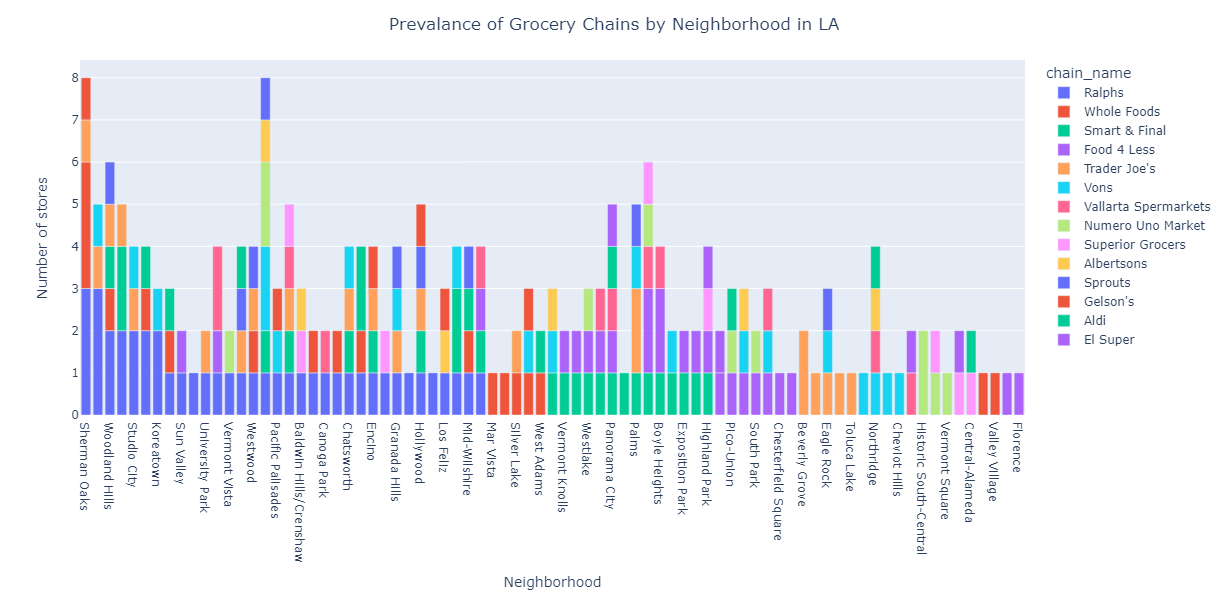

In [33]:
#Import required package.
import plotly.express as px

# Create a new dataframe that aggregates the data by neighborhood and chain name.
chains_grouped = chain_with_neighborhood.value_counts(['chain_name','name']).reset_index(name='count')
chains_grouped

# Make a stacked bar chart that is properly labeled and big enough for all labels to show up.
fig = px.bar(chains_grouped,
       x='name',
       y='count',
       color='chain_name',
       labels={
            'name':'Neighborhood',
            'count':'Number of stores'
        }
)

fig.update_layout(
    width = 1400,
    height = 600,
    title='Prevalance of Grocery Chains by Neighborhood in LA',
    title_x=0.5 # aligns title to center
)

fig.show()

<b>Figure 2: Interactive Map of Grocery Chains</b><br>
Next, I will create an interactive map that has the locations of each grocery chain in the City of LA, where the markers are colored by the name of the chain. This helps us understand the spatial distribution of chains overall and _which_ chains are in which areas. For example, while Ralphs is the largest chain in the city, they have no real presence east of Downtown.

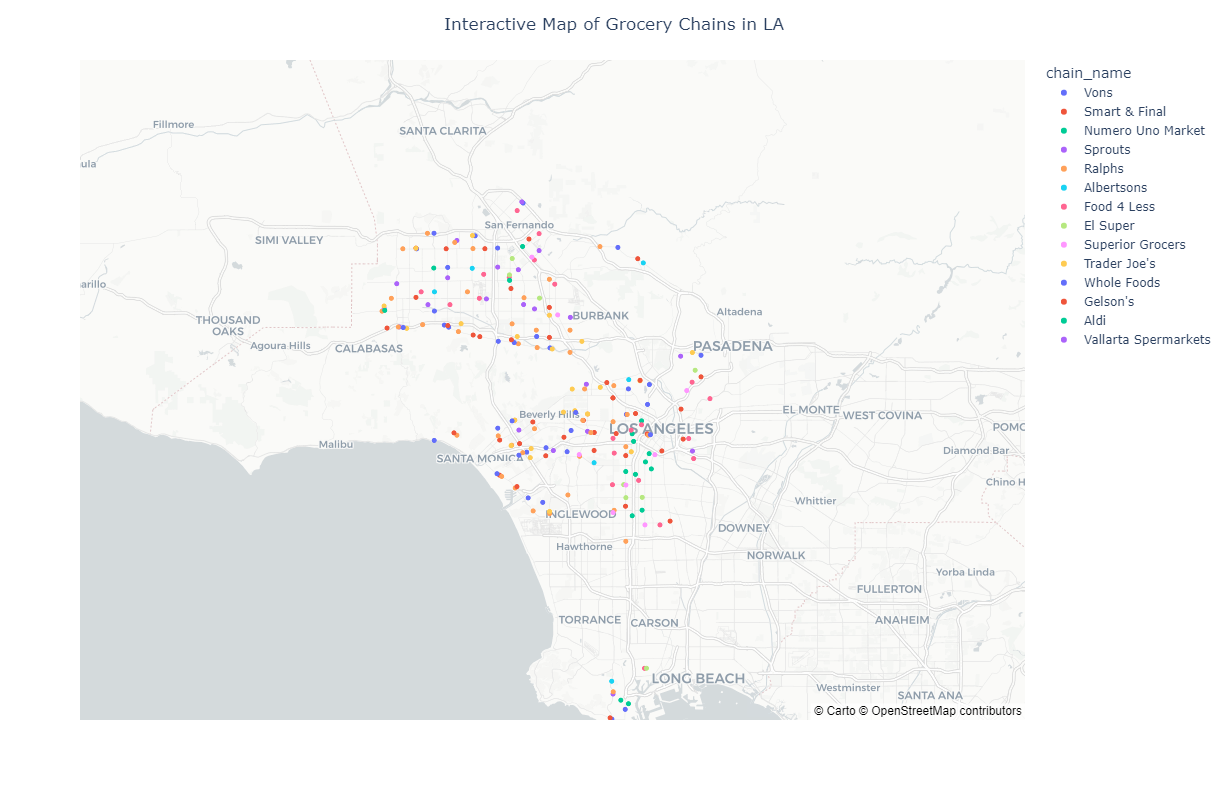

In [34]:
# Create an interactive map where markers are colored by the name of the chain.
fig = px.scatter_mapbox(chain_with_neighborhood,
                        lat='Latitude',
                        lon='Longitude',
                        color='chain_name',
                        mapbox_style="carto-positron")

# Update layout with desired size, zoom, title, etc.
fig.update_layout(
    width = 800,
    height = 800,
    mapbox_style="carto-positron",
    mapbox_zoom=9,
    title = "Interactive Map of Grocery Chains in LA",
    title_x=0.5 
)

fig.show()

<b>Figure 3: Choropleth Map of Grocery Chains by Neighborhood</b><br>
Finally, I will create a static choropleth map that has the count of grocery chains present in each neighborhood of the City of LA.

In [35]:
#Create count of chain stores per neighborhood.
chainstore_counts = neighborhood_with_chain.value_counts('name').reset_index(name='chainstore_counts')

#Merge counts onto original neighborhoods geodataframe
neighborhoods = neighborhoods.merge(chainstore_counts, how='left', on='name')

In [36]:
#Replace neighborhoods with a null value with a 0 because there are no chain stores.
neighborhoods['chainstore_counts'] = neighborhoods['chainstore_counts'].fillna(0)

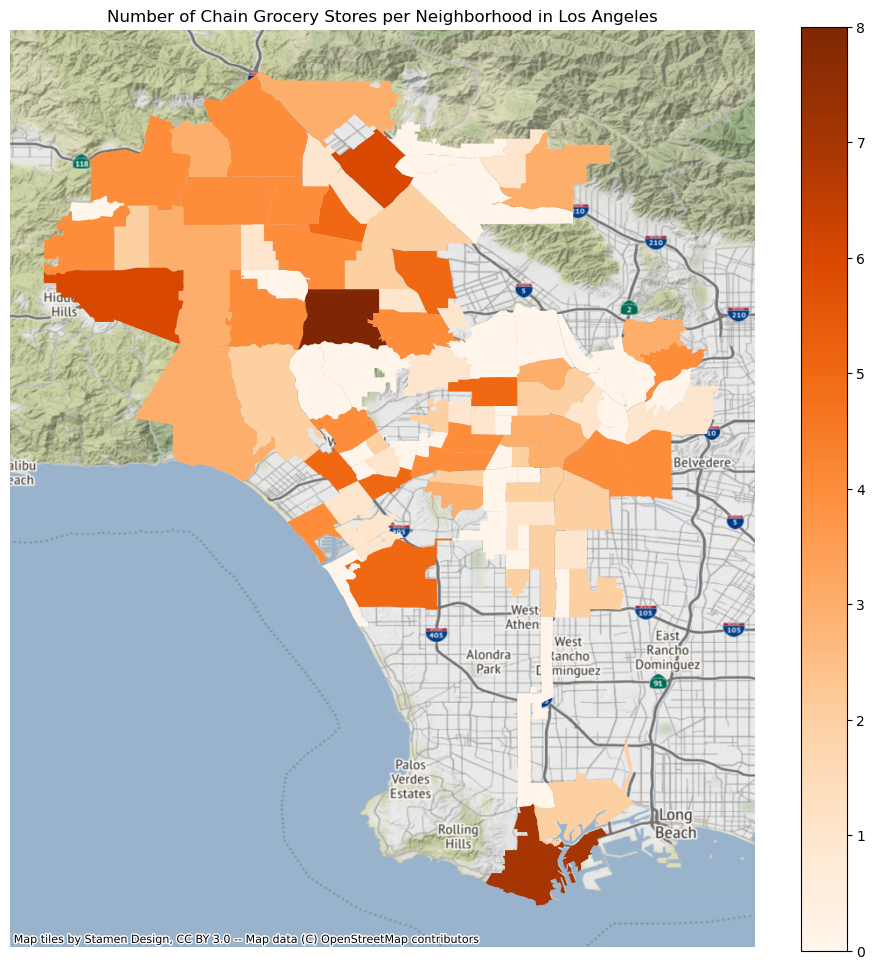

In [37]:
#Create choropleth map of chains by neighborhood while being careful that color scheme & basemap are not ambiguous.
fig,ax = plt.subplots(figsize=(12,12))
neighborhoods.plot(ax=ax,column='chainstore_counts',legend=True,cmap='Oranges')

ax.axis('off')
ax.set_title('Number of Chain Grocery Stores per Neighborhood in Los Angeles')
ctx.add_basemap(ax, crs=4326)

<b>Map for Future Data Cleaning Work</b><br>Finally, since this is still a work in progress, I want to make a map that lets me explore the locations that have not been tagged as a chain yet. This will aid in identifying additional "chains" that should be added to the list

In [38]:
# Add information about the neighborhood to the  geodataframe of all SNAP retailers.
snap_with_neighborhood = gpd.sjoin(snap_clean, neighborhoods) 

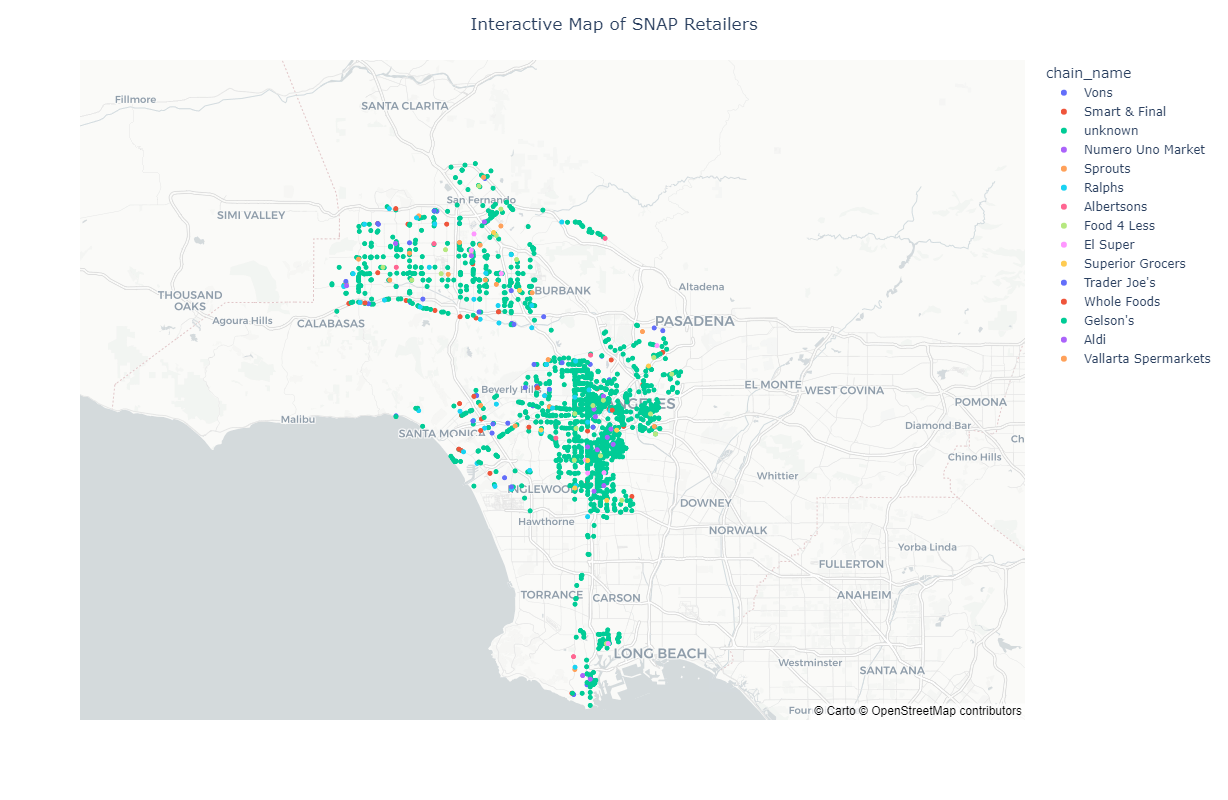

In [39]:
# Create an interactive map where markers are colored by the name of the chain or lack of existing label.
fig = px.scatter_mapbox(snap_with_neighborhood,
                        lat='Latitude',
                        lon='Longitude',
                        color='chain_name',
                        mapbox_style="carto-positron")

# options on the layout
fig.update_layout(
    width = 800,
    height = 800,
    mapbox_zoom=9,
    title = "Interactive Map of SNAP Retailers",
    title_x=0.5 # aligns title to center
)

fig.show()

### Part 3: Relationship between Seniors and Grocery Stores

Finally, I'm going to make a simple map that pulls together the results from Part II and the analysis about where Seniors live that one of the other members of my group completed. First I will read in a geojson file of the number of seniors per square mile for each block group in the City of LA.

In [42]:
#Read the geojson file that Lucy created this week.
seniors=gpd.read_file('Senior_Pop_Density.geojson')
seniors.head()

BG20   ShapeSTArea          FIPS  Age 65-74  Age 75-84  Age 85+  \
0  2742023  1.045276e+06  060372742023          0          0       13   
1  2739025  5.131686e+06  060372739025        120         38        0   
2  2739024  1.861628e+06  060372739024         90         10        0   
3  2739023  1.218168e+06  060372739023         92        137       11   
4  2735023  4.868382e+06  060372735023         29         40        0   

   Total Senior Pop  Square Miles  Pop Density  \
0                13      0.403581         32.0   
1               158      1.981346         80.0   
2               100      0.718775        139.0   
3               240      0.470335        510.0   
4                69      1.879684         37.0   

                                            geometry  
0  POLYGON ((-118.46464 33.97641, -118.46508 33.9...  
1  MULTIPOLYGON (((-118.47291 33.98356, -118.4713...  
2  POLYGON ((-118.46565 33.97974, -118.46587 33.9...  
3  POLYGON ((-118.46315 33.98615, -118.46310 33.9...  
4  POLYGON ((-118.47672 33.98746, -118.47506 33.9...

Now I can create our final map of senior density and grocery stores using this file and the one created in Part II!

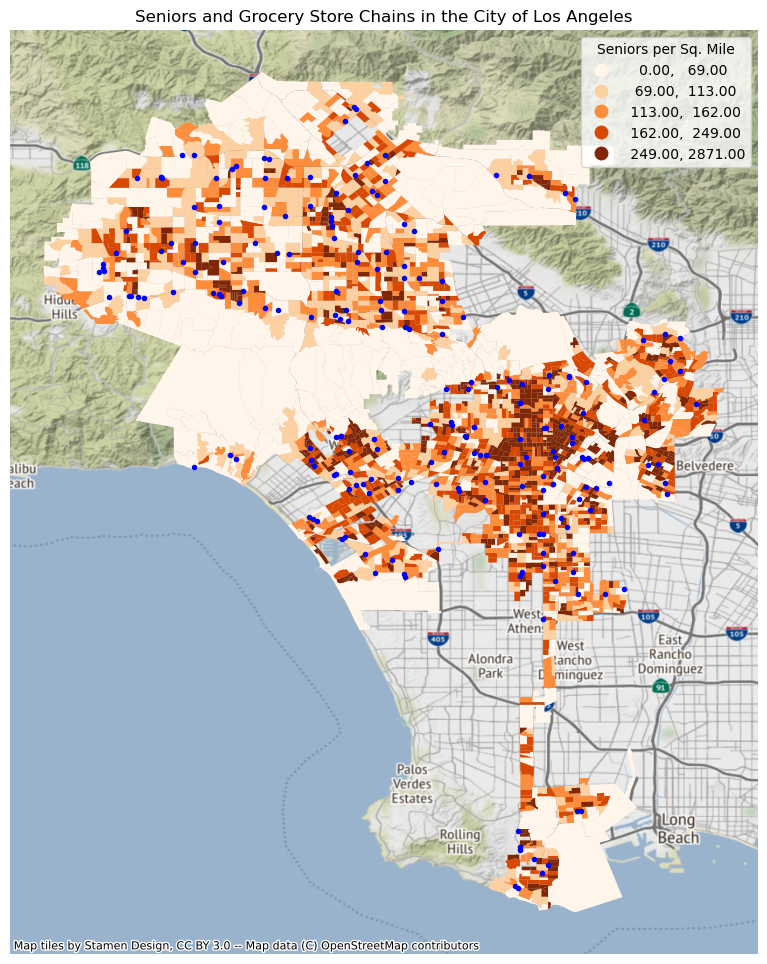

In [43]:
#Plot the two dataframes desired.
fig,ax = plt.subplots(figsize=(12,12))
ax1=seniors.plot(ax=ax,column='Pop Density',scheme='quantiles',legend=True,cmap='Oranges',
              legend_kwds={
               'loc': 'upper right',
               'bbox_to_anchor':(1,1),
               'title': 'Seniors per Sq. Mile'
            }),
ax2=chain_with_neighborhood.plot(ax=ax,marker='.',markersize=35,legend=True,color='blue')

#Format plot.
ax.axis('off')
ax.set_title('Seniors and Grocery Store Chains in the City of Los Angeles')
ctx.add_basemap(ax, crs=4326)